# About dataset and problem statement
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

dataset has obervations from 1993 to 2015, it has all the details of the customer who took insurance and made claims. we are also given Umbrela limit which means that customer has taken additional policy cover as well. there are some missing values in the data which needs treatment. data is mix of data typs. 

it is classification problem, we have 1000 rows and 40 coluns along with target columns which is fraud happened or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
insure_ds = pd.read_csv("insurance.csv")
insure_ds.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
insure_ds.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
insure_ds.shape

(1000, 40)

we have 1000 rows and 40 columns including target. let check the data type of the columns 

In [6]:
insure_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

we have float64(2), int64(17), object(21) columns. last column _c39  all are null values. lets check the missing value in others columns

In [7]:
missing_val ={}
for i in insure_ds.columns:
    if insure_ds[i].isnull().sum() >0:
        missing_val[i] = insure_ds[i].isnull().sum()
print(missing_val)

{'_c39': 1000}


In [8]:
# we are deleting it _c39.
insure_ds.drop("_c39",axis =1, inplace = True)

In [9]:
# let's describe the data
# It will demonstrate the count, mean, std dev, min, max, etc values for number data type
insure_ds.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


1. maximum deductable money is 2000 max and minimum is 500 against the premium 2047 whcih is max. 
2. umbrela limit is the policy which customer take over and above the insurance policy like while taking the term loan, diseases cover is also taken for some amount
3. capital gain is 100500 max and max loss which customer had to bear is 111100 .very high ! 

In [10]:
insure_ds.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [11]:
category_col = insure_ds.select_dtypes(include = "object")

In [12]:
category_col.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [13]:
category_col.describe()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,05-08-1992,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,3930 Embaracadero St,?,?,Dodge,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


Maximum incident was reported from New york, we have ? marks in Property damge and police report available and collision_type columns, we will deal with them.

In [14]:
for i in category_col.columns:
    print(i,"\n",category_col[i].value_counts(),"\n")

policy_bind_date 
 05-08-1992    3
28-04-1992    3
01-01-2006    3
14-04-1992    2
28-12-2002    2
             ..
26-08-2013    1
13-10-1990    1
23-05-1999    1
04-12-2007    1
10-04-1992    1
Name: policy_bind_date, Length: 951, dtype: int64 

policy_state 
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

policy_csl 
 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 

insured_sex 
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

insured_education_level 
 JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

insured_occupation 
 machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-se

we have these columns which are having ? mark in the dataset:-
collision_type, property_damage and policy_report_available

we will replace them with nan value and then fill them..


# Replace & fill Missing values 

In [15]:
# will find the ? mark and replace with np.nan

insure_ds = insure_ds.replace("?", np.nan) 

In [16]:
# checking the missing value, that how many colums have actully missing value
missing_val ={}
for i in insure_ds.columns:
    if insure_ds[i].isnull().sum() >0:
        missing_val[i] = insure_ds[i].isnull().sum()
print(missing_val)

{'collision_type': 178, 'property_damage': 360, 'police_report_available': 343}


In [17]:
# We will fill collision_type with mode values 

insure_ds["collision_type"] = insure_ds["collision_type"].fillna(insure_ds["collision_type"].mode()[0])

"""we are going to fill propertry damage and police report columns with mode values which is NO 
and also assuming as question mark sign is that no information is available thus it will be safe"""   

insure_ds["property_damage"] = insure_ds["property_damage"].fillna(insure_ds["property_damage"].mode()[0])
insure_ds["police_report_available"] = insure_ds["police_report_available"].fillna(insure_ds["police_report_available"].mode()[0])
 

In [18]:
# Again checking missing value to check that all have been filled ?

missing_val ={}
for i in insure_ds.columns:
    if insure_ds[i].isnull().sum() >0:
        missing_val[i] = insure_ds[i].isnull().sum()
print(missing_val)

{}


All missing value have been filled, now lets check numeric column status 

 # EDA

In [19]:
num_col = insure_ds.select_dtypes(exclude = "object")

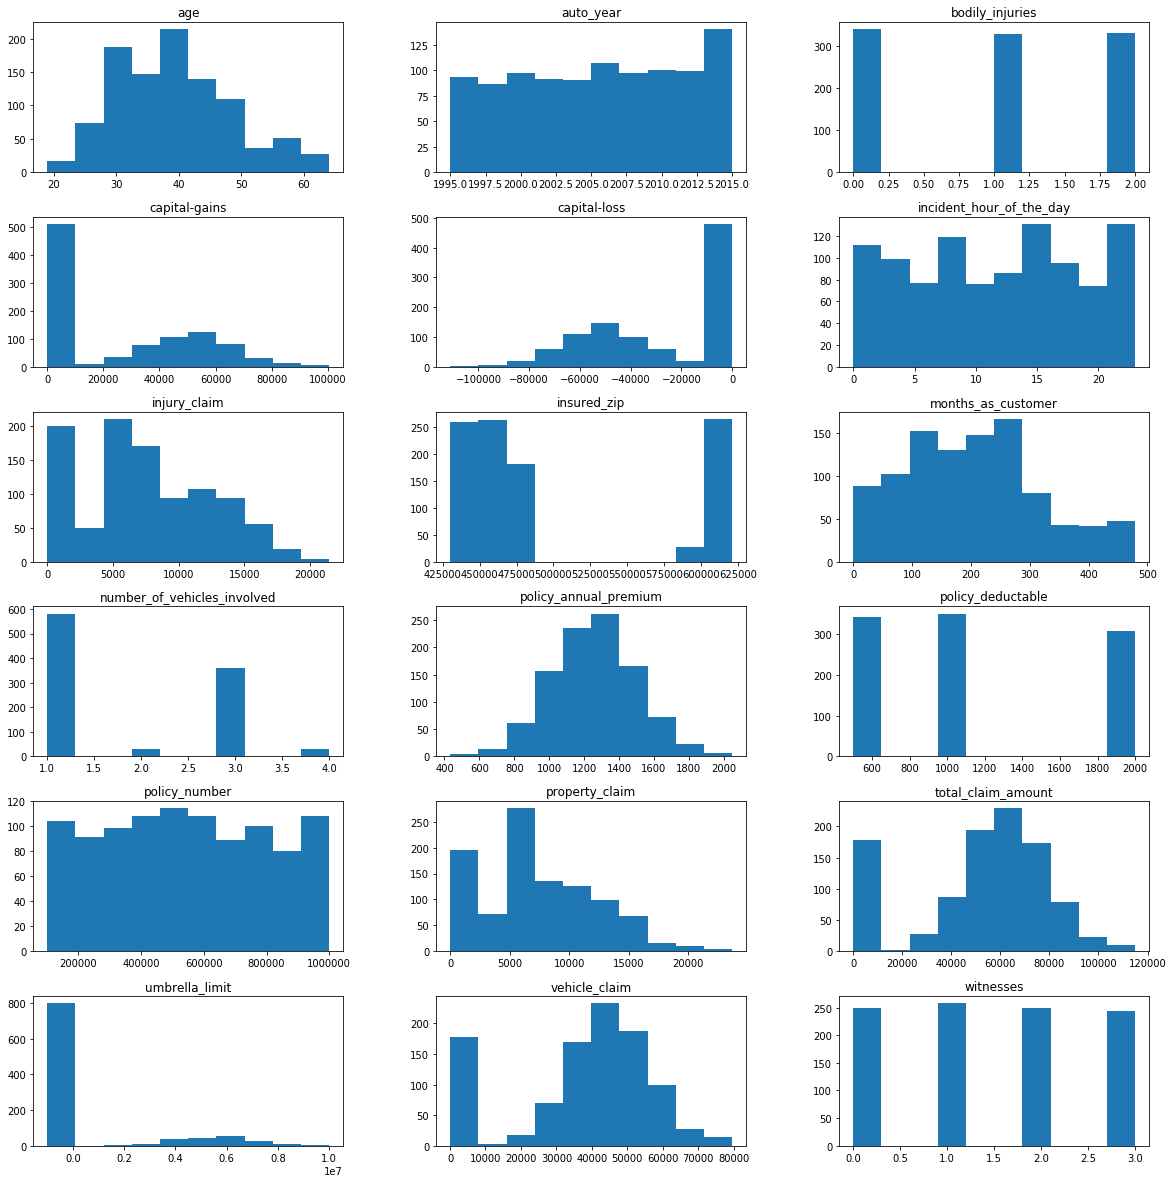

In [20]:
num_col.hist(figsize = (20,35), layout = (10,3), grid = False);

1. couple of columns are nominal and their data types already int and we cannot perform any statistical method, like correct outlier or skewnes etc
2. capital_win is right skewed and loss is left skewed
3. annual claim is close to normal distribution<br>
we check continous feature's outlier and correct them

In [21]:
box_plot = insure_ds[["capital-gains","capital-loss","injury_claim","property_claim","total_claim_amount","vehicle_claim"]]

In [22]:
low_scale_num_col = insure_ds[["age","policy_annual_premium","policy_deductable"]]

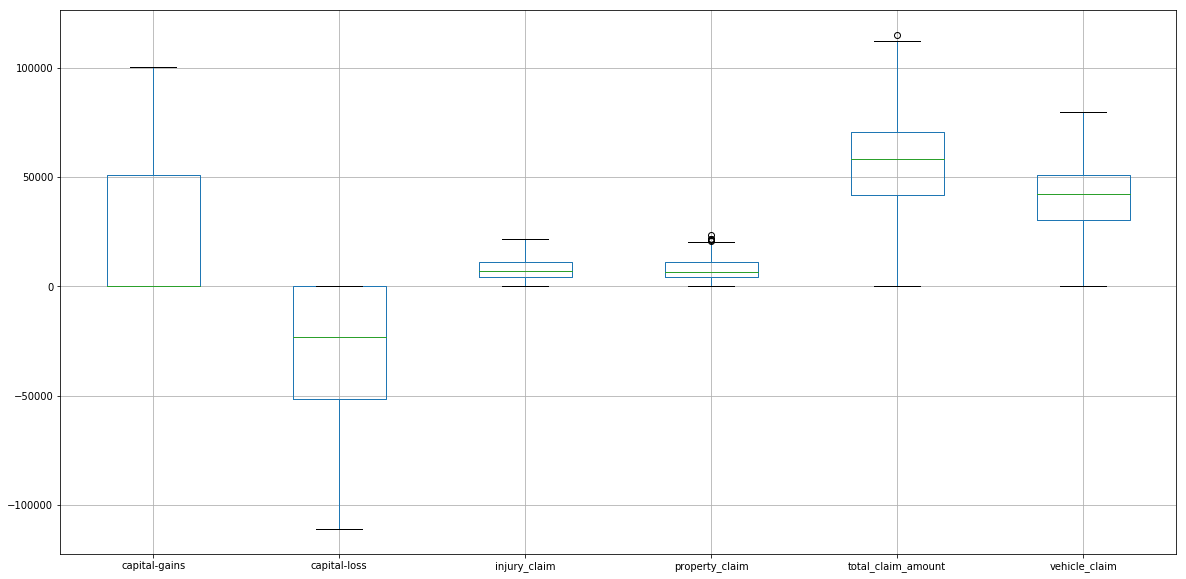

In [23]:
box_plot.boxplot(figsize=(20,10));

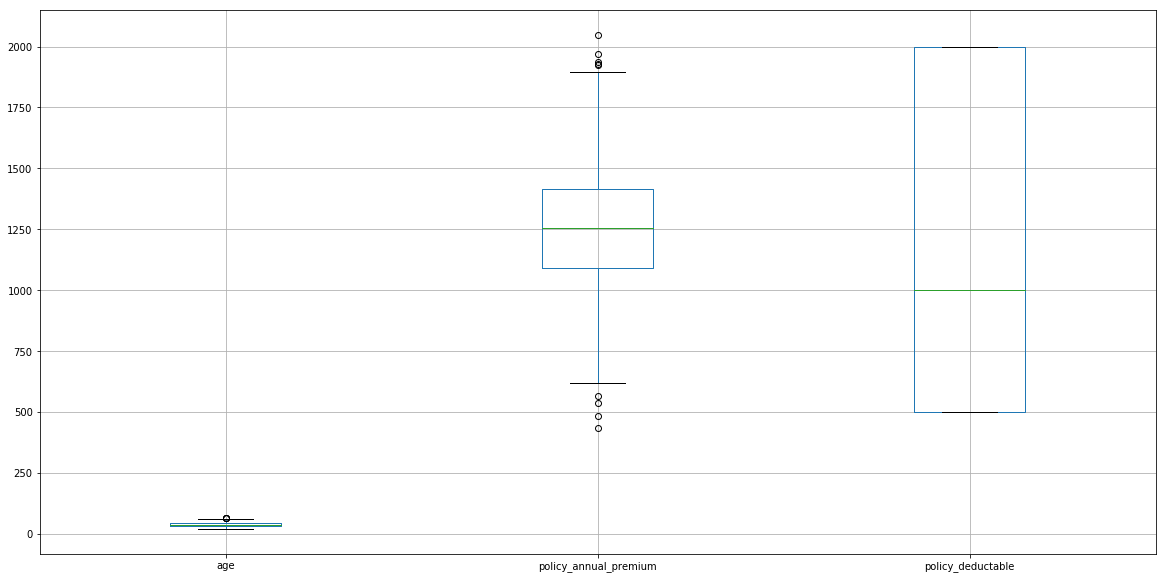

In [24]:
low_scale_num_col.boxplot(figsize=(20,10));

i divided numerical col scale wise so that boxplot can be plot easily and it also be visible. it has been observed that no major extreme value observed. we have seen a few columns values near to upper and lower whiskers and considering those are ok for the data point. 

'Since we have to identify fraud cases and it is obivious that it would be less in number as we can see in below graph\nfraud No cases are higher tham Yes'

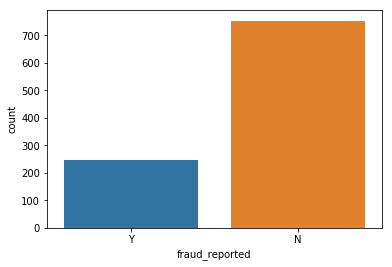

In [25]:
# checking target class distribution

sns.countplot(insure_ds["fraud_reported"])

"""Since we have to identify fraud cases and it is obivious that it would be less in number as we can see in below graph
fraud No cases are higher tham Yes"""

In [26]:
import warnings
warnings.filterwarnings("ignore")
insure_ds.groupby("insured_sex")["total_claim_amount","injury_claim","property_claim","vehicle_claim"].mean()

,total_claim_amount,injury_claim,property_claim,vehicle_claim
insured_sex,,,,
FEMALE,53343.314711,7429.236499,7466.145251,38447.932961
MALE,52087.645788,7438.272138,7322.354212,37327.019438


on a broader side,  Gender wise claim amount is also same, female has applied for claim is bit higher. 

In [27]:
# fraud actvity wise claim amount
insure_ds.groupby("fraud_reported")["policy_annual_premium","total_claim_amount","injury_claim","property_claim","vehicle_claim"].mean()



,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim
fraud_reported,,,,,
N,1258.430000,50288.605578,7179.229748,7018.884462,36090.491368
Y,1250.236275,60302.105263,8208.340081,8560.121457,43533.643725


Y denotes to fraud activity and and it is seen that amount is higher incase any one doing fraud, it is higher in all
category

In [28]:
insure_ds.groupby(["fraud_reported","incident_state"])["policy_annual_premium","total_claim_amount","injury_claim","property_claim","vehicle_claim"].mean().sort_values(by="total_claim_amount", ascending = False)



policy_annual_premium  total_claim_amount  \
fraud_reported incident_state                                              
Y              NY                        1237.262069        63880.344828   
               SC                        1227.892055        63238.630137   
               WV                        1256.404103        60588.205128   
               OH                        1298.312000        58119.000000   
               NC                        1246.387647        55801.470588   
               VA                        1284.711600        55167.600000   
N              NY                        1258.885196        54258.382353   
               PA                        1190.895909        51571.818182   
               SC                        1245.838800        50981.314286   
               VA                        1296.164471        48477.411765   
               WV                        1278.972640        47945.000000   
               NC                        1235.185000        46368.157895   
Y              PA                        1366.648750        44071.250000   
N              OH                        1142.964615        43348.461538   

                               injury_claim  property_claim  vehicle_claim  
fraud_reported incident_state                                               
Y              NY               8420.172414     9002.586207   46457.586207  
               SC               8606.438356     9424.383562   45207.808219  
               WV               8430.256410     9002.820513   43155.128205  
               OH               9728.000000     7440.000000   40951.000000  
               NC               7382.352941     7702.058824   40717.058824  
               VA               7212.400000     6751.200000   41204.000000  
N              NY               7836.470588     7519.117647   38902.794118  
               PA               6942.272727     8173.181818   36456.363636  
               SC               7334.857143     7227.028571   36419.428571  
               VA               7334.588235     6527.764706   34615.058824  
               WV               6789.831461     6679.438202   34475.730337  
               NC               6155.921053     6409.210526   33803.026316  
Y              PA               6681.250000     6007.500000   31382.500000  
N              OH               5470.000000     5836.923077   32041.538462

In [29]:
insure_ds.groupby(["incident_state"])["policy_annual_premium","total_claim_amount","injury_claim","property_claim","vehicle_claim"].mean().sort_values(by="total_claim_amount", ascending = False)



,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim
incident_state,,,,,
NY,1254.098397,56388.435115,7965.687023,7847.519084,40575.229008
SC,1240.556089,54589.314516,7709.153226,7873.830645,39006.330645
WV,1274.916544,50217.281106,7084.654378,7097.004608,36035.622120
VA,1293.561545,49997.909091,7306.818182,6578.545455,36112.545455
OH,1210.506957,49770.434783,7321.304348,6533.913043,35915.217391
PA,1237.763333,49571.666667,6872.666667,7595.666667,35103.333333
NC,1238.647636,49283.909091,6535.000000,6808.818182,35940.090909


top 3 states where maximum fraud amount claimed are NY,SC,WV and these are the states where maximum incident happened 

In [30]:
# Extracting the date , month and year from policy_bind_date for further analysis

insure_ds["policy_bind_date"] = pd.to_datetime(insure_ds["policy_bind_date"])

insure_ds["Date"] =  insure_ds["policy_bind_date"].dt.day
insure_ds["Month"] =  insure_ds["policy_bind_date"].dt.month
insure_ds["Year"] =  insure_ds["policy_bind_date"].dt.year


In [31]:

pd.pivot_table(insure_ds, values =["total_claim_amount"], index = ["Year"], columns = ["fraud_reported"], aggfunc ="mean")

total_claim_amount              
fraud_reported                  N             Y
Year                                           
1990                 51701.052632  72143.000000
1991                 44264.761905  58556.923077
1992                 50909.736842  52381.000000
1993                 55703.200000  76722.500000
1994                 40414.285714  62930.000000
1995                 42989.655172  64923.000000
1996                 55680.937500  65074.545455
1997                 50987.500000  64325.000000
1998                 53273.000000  60690.000000
1999                 44765.862069  65350.909091
2000                 56121.481481  70507.500000
2001                 49985.937500  56872.222222
2002                 49954.285714  59182.666667
2003                 53425.200000  58995.000000
2004                 52641.111111  57510.000000
2005                 56869.393939  65065.714286
2006                 48589.062500  42791.111111
2007                 45351.290323  56806.666667
2008                 43978.695652  57338.000000
2009                 52222.857143  50396.250000
2010                 54247.096774  50858.571429
2011                 47621.200000  56942.857143
2012                 45238.181818  62492.857143
2013                 55589.259259  65297.500000
2014                 55468.125000  55102.727273
2015                 40273.333333           NaN

policies which are purchases in 2015, on that no frauc claims have beem made so far

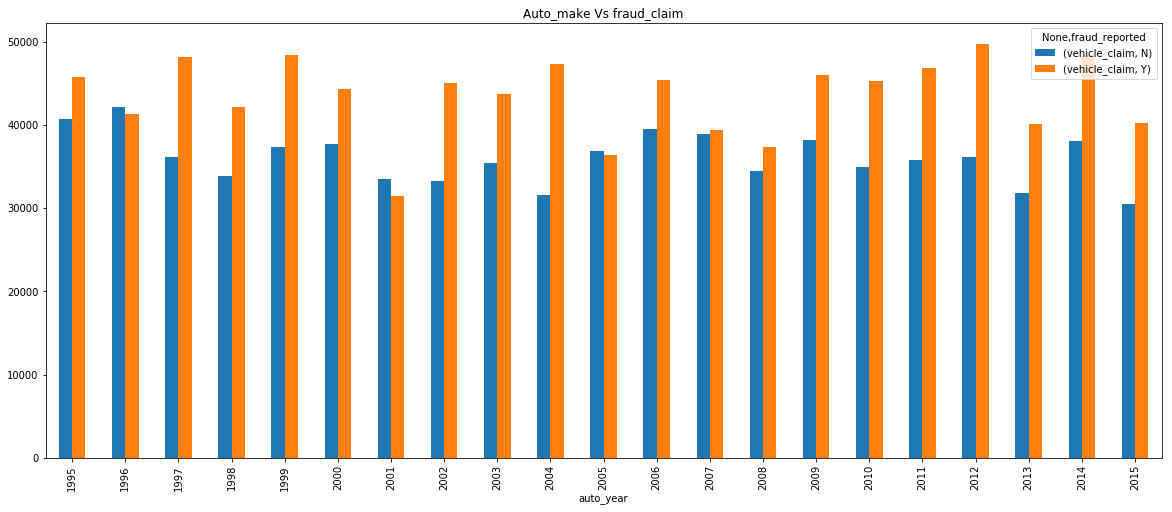

In [32]:

pd.pivot_table(insure_ds, values =["vehicle_claim"], index = ["auto_year"], columns = ["fraud_reported"], aggfunc ="mean").plot(kind = "bar",figsize = (20,8))
plt.title("Auto_make Vs fraud_claim");

people have made fraud vahicle claim  almost all the year but we see a bit higher trend in 2012 

In [33]:
# Extracting the date , month and year from policy_bind_date for further analysis

insure_ds["incident_date"] = pd.to_datetime(insure_ds["incident_date"])

insure_ds["incident_day"] =  insure_ds["incident_date"].dt.day
insure_ds["incident_Month"] =  insure_ds["incident_date"].dt.month
insure_ds["incident_Year"] =  insure_ds["incident_date"].dt.year


In [34]:

pd.pivot_table(insure_ds, values =["total_claim_amount"], index = ["incident_Month"], columns = ["fraud_reported"], aggfunc ="mean")

total_claim_amount              
fraud_reported                  N             Y
incident_Month                                 
1                    49558.796992  60485.757576
2                    48631.463415  58795.757576
3                    47678.000000  65570.000000
4                    50330.370370  59633.333333
5                    41372.777778  44268.000000
6                    60459.032258  60288.333333
7                    59532.692308  50206.666667
8                    56170.434783  64866.250000
9                    53605.454545  62640.000000
10                   45021.666667  68406.000000
11                   55733.125000  70503.333333
12                   53799.655172  62641.000000

we can see high fraud in all the 2015 months except a one  which is may, these are all policies taken from 1993 to 2014. not 2015 case. 

In [35]:
insure_ds.groupby("insured_education_level")["policy_annual_premium","total_claim_amount","injury_claim","property_claim","vehicle_claim"].mean().sort_values(by ="total_claim_amount")

,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim
insured_education_level,,,,,
Associate,1255.085310,48907.793103,6431.103448,6679.034483,35797.655172
JD,1247.967453,51490.745342,7608.385093,7155.714286,36726.645963
College,1253.231803,51978.770492,7309.672131,7323.852459,37345.245902
High School,1284.749375,52225.562500,7311.500000,7491.437500,37422.625000
Masters,1228.496154,54464.335664,7604.755245,7646.993007,39212.587413
MD,1264.681111,55296.875000,7914.583333,7999.097222,39383.194444
PhD,1258.022480,55453.200000,7897.280000,7532.080000,40023.840000


In [36]:

pd.pivot_table(insure_ds, values =["total_claim_amount","injury_claim","property_claim","vehicle_claim"], index = ["insured_education_level"], columns = ["fraud_reported"], aggfunc ="mean")

injury_claim              property_claim               \
fraud_reported                     N            Y              N            Y   
insured_education_level                                                         
Associate                5904.504505  8150.294118    5866.666667  9331.176471   
College                  6879.666667  8519.062500    6867.333333  8607.812500   
High School              7335.806452  7227.777778    7438.951613  7672.222222   
JD                       7182.352941  8815.476190    6656.722689  8569.523810   
MD                       7752.452830  8366.842105    7477.264151  9454.736842   
Masters                  7490.450450  8001.250000    7426.396396  8412.187500   
PhD                      7759.239130  8282.121212    7439.782609  7789.393939   

                        total_claim_amount               vehicle_claim  \
fraud_reported                           N             Y             N   
insured_education_level                                                  
Associate                     44883.693694  62045.294118  33112.522523   
College                       49195.333333  59807.187500  35448.333333   
High School                   51144.032258  55950.833333  36369.274194   
JD                            47877.478992  61728.333333  34038.403361   
MD                            53097.830189  61431.052632  37868.113208   
Masters                       52607.207207  60906.250000  37690.360360   
PhD                           53810.869565  60031.818182  38611.847826   

                                       
fraud_reported                      Y  
insured_education_level                
Associate                44563.823529  
College                  42680.312500  
High School              41050.833333  
JD                       44343.333333  
MD                       43609.473684  
Masters                  44492.812500  
PhD                      43960.303030

in total claim, people who have Associate level education, they made high fruad followed by JD and MD 

In [37]:

pd.pivot_table(insure_ds, values =["total_claim_amount","injury_claim","property_claim","vehicle_claim"], index = ["insured_occupation"], columns = ["fraud_reported"], aggfunc ="mean")

injury_claim              property_claim                \
fraud_reported                N            Y              N             Y   
insured_occupation                                                          
adm-clerical        6492.777778  7392.727273    6812.037037   6559.090909   
armed-forces        7483.269231  7022.352941    7061.346154   7670.000000   
craft-repair        7261.346154  8484.090909    7691.923077   8787.272727   
exec-managerial     8481.250000  6664.642857    7873.333333   7928.928571   
farming-fishing     6600.810811  7609.375000    6193.513514   8220.000000   
handlers-cleaners   8347.906977  8359.090909    8491.395349   7497.272727   
machine-op-inspct   7698.732394  7575.454545    7241.830986   7712.272727   
other-service       6182.033898  8506.666667    6291.016949   9116.666667   
priv-house-serv     7322.881356  7400.833333    6851.016949   9149.166667   
prof-specialty      7157.761194  9236.666667    7400.447761   9027.777778   
protective-serv     6759.795918  9679.285714    6854.897959   8685.714286   
sales               6404.545455  7851.904762    6103.818182   9267.142857   
tech-support        6937.678571  9879.545455    6436.071429   8920.000000   
transport-moving    7517.254902  9440.000000    7070.392157  10413.333333   

                   total_claim_amount               vehicle_claim  \
fraud_reported                      N             Y             N   
insured_occupation                                                  
adm-clerical             45982.962963  49854.545455  32678.148148   
armed-forces             51811.730769  54182.352941  37267.115385   
craft-repair             53109.038462  58170.909091  38155.769231   
exec-managerial          56015.000000  57050.714286  39660.416667   
farming-fishing          46367.567568  57635.000000  33573.243243   
handlers-cleaners        63383.023256  54916.363636  46543.720930   
machine-op-inspct        54170.422535  54334.545455  39229.859155   
other-service            46414.067797  63580.000000  33941.016949   
priv-house-serv          50356.440678  58274.166667  36182.542373   
prof-specialty           49910.447761  64245.555556  35352.238806   
protective-serv          47234.081633  70078.571429  33619.387755   
sales                    43633.454545  62972.857143  31125.090909   
tech-support             46184.821429  65129.545455  32811.071429   
transport-moving         50948.039216  70061.428571  36360.392157   

                                  
fraud_reported                 Y  
insured_occupation                
adm-clerical        35902.727273  
armed-forces        39490.000000  
craft-repair        40899.545455  
exec-managerial     42457.142857  
farming-fishing     41805.625000  
handlers-cleaners   39060.000000  
machine-op-inspct   39046.818182  
other-service       45956.666667  
priv-house-serv     41724.166667  
prof-specialty      45981.111111  
protective-serv     51713.571429  
sales               45853.809524  
tech-support        46330.000000  
transport-moving    50208.095238

protective-serv and transport-moving have made high fraud claim followed by tech-support

In [38]:

pd.pivot_table(insure_ds, values =["total_claim_amount","injury_claim","property_claim","vehicle_claim"], index = ["insured_hobbies"], columns = ["fraud_reported"], aggfunc ="mean")

injury_claim               property_claim                \
fraud_reported             N             Y              N             Y   
insured_hobbies                                                           
base-jumping     6248.055556   6330.000000    6050.833333   6460.769231   
basketball       7475.714286  10501.666667    7601.071429  11333.333333   
board-games      7897.352941   9539.285714    7538.235294  11161.428571   
bungie-jumping   6724.468085   8144.444444    6763.617021   8718.888889   
camping          7511.200000   7616.000000    7179.800000   7804.000000   
chess            6681.250000   6630.263158   10956.250000   6734.210526   
cross-fit        8504.444444   7943.846154    7523.333333   8388.846154   
dancing          7922.105263   7546.000000    7038.947368   8520.000000   
exercise         7200.434783   6456.363636    7181.956522   9550.000000   
golf             6165.918367   5443.333333    5886.122449   7966.666667   
hiking           8183.750000   9344.166667    7491.750000   8383.333333   
kayaking         6997.551020   8028.000000    7549.591837   8224.000000   
movies           6845.869565   8677.777778    6729.347826   6888.888889   
paintball        7552.954545  11251.538462    7259.318182   8117.692308   
polo             6837.647059  11556.153846    6897.647059   8239.230769   
reading          5934.680851   7561.176471    6313.829787   8501.176471   
skydiving        8103.157895   5944.545455    8820.789474   7717.272727   
sleeping         7270.909091   9423.750000    6410.000000   9286.250000   
video-games      6887.250000  10140.000000    6886.250000  10882.000000   
yachting         7972.432432   8733.750000    6155.405405  11891.875000   

                total_claim_amount               vehicle_claim                
fraud_reported                   N             Y             N             Y  
insured_hobbies                                                               
base-jumping          44819.722222  50000.769231  32520.833333  37210.000000  
basketball            55237.857143  69710.000000  40161.071429  47875.000000  
board-games           51106.764706  66134.285714  35671.176471  45433.571429  
bungie-jumping        49076.808511  58820.000000  35588.723404  41956.666667  
camping               54379.200000  59868.000000  39688.200000  44448.000000  
chess                 65061.250000  52183.421053  47423.750000  38818.947368  
cross-fit             56070.000000  62319.615385  40042.222222  45986.923077  
dancing               50893.947368  61058.000000  35932.894737  44992.000000  
exercise              50462.173913  65263.636364  36079.782609  49257.272727  
golf                  46955.306122  52493.333333  34903.265306  39083.333333  
hiking                55233.000000  63432.500000  39557.500000  45705.000000  
kayaking              50266.938776  59770.000000  35719.795918  43518.000000  
movies                49548.043478  57938.888889  35972.826087  42372.222222  
paintball             48976.363636  62590.769231  34164.090909  43221.538462  
polo                  45798.823529  65792.307692  32063.529412  45996.923077  
reading               45687.234043  57090.588235  33438.723404  41028.235294  
skydiving             58839.736842  54914.545455  41915.789474  41252.727273  
sleeping              51077.575758  64581.250000  37396.666667  45871.250000  
video-games           46196.500000  73208.000000  32423.000000  52186.000000  
yachting              48173.783784  66032.500000  34045.945946  45406.875000

people who have gaming habit, they made more fraud as per the datapoint followed by sleeping  

In [39]:
insure_ds.groupby("insured_sex")["capital-gains","capital-loss"].mean()

,capital-gains,capital-loss
insured_sex,,
FEMALE,25656.238361,-26227.560521
MALE,24511.231102,-27450.323974


Male faced more loss as compared to female 

In [40]:

pd.pivot_table(insure_ds, values =["total_claim_amount","injury_claim","property_claim","vehicle_claim"], index = ["incident_type"], columns = ["fraud_reported"], aggfunc ="mean")

injury_claim              property_claim  \
fraud_reported                      N            Y              N   
incident_type                                                       
Multi-vehicle Collision   8874.229508  8541.052632    8668.983607   
Parked Car                 755.131579   606.250000     759.078947   
Single Vehicle Collision  9003.566434  8917.264957    8810.839161   
Vehicle Theft              778.023256   701.250000     739.418605   

                                      total_claim_amount                \
fraud_reported                      Y                  N             Y   
incident_type                                                            
Multi-vehicle Collision   8768.508772       61697.901639  61474.122807   
Parked Car                 776.250000        5330.789474   5093.750000   
Single Vehicle Collision  9417.777778       63521.958042  66702.905983   
Vehicle Theft              831.250000        5546.976744   5197.500000   

                         vehicle_claim                
fraud_reported                       N             Y  
incident_type                                         
Multi-vehicle Collision   44154.688525  44164.561404  
Parked Car                 3816.578947   3711.250000  
Single Vehicle Collision  45707.552448  48367.863248  
Vehicle Theft              4029.534884   3665.000000

In [41]:

pd.pivot_table(insure_ds, values =["total_claim_amount","injury_claim","property_claim","vehicle_claim"], index = ["incident_severity","incident_type"], columns = ["fraud_reported"], aggfunc ="mean")

injury_claim               \
fraud_reported                                        N            Y   
incident_severity incident_type                                        
Major Damage      Multi-vehicle Collision   9471.333333  8470.595238   
                  Single Vehicle Collision  8510.408163  9130.481928   
Minor Damage      Multi-vehicle Collision   8931.344538  8886.363636   
                  Parked Car                 812.702703   638.000000   
                  Single Vehicle Collision  9279.663866  8950.588235   
                  Vehicle Theft              845.853659   736.000000   
Total Loss        Multi-vehicle Collision   8535.952381  8652.631579   
                  Single Vehicle Collision  8929.915254  7842.941176   
Trivial Damage    Parked Car                 700.512821   553.333333   
                  Vehicle Theft              716.222222   643.333333   

                                           property_claim               \
fraud_reported                                          N            Y   
incident_severity incident_type                                          
Major Damage      Multi-vehicle Collision     9867.666667  8692.619048   
                  Single Vehicle Collision    8228.979592  9880.361446   
Minor Damage      Multi-vehicle Collision     8511.512605  8301.818182   
                  Parked Car                   841.081081   734.000000   
                  Single Vehicle Collision    9106.470588  7035.882353   
                  Vehicle Theft                767.317073   836.000000   
Total Loss        Multi-vehicle Collision     8246.904762  9374.210526   
                  Single Vehicle Collision    8754.322034  9541.176471   
Trivial Damage    Parked Car                   681.282051   846.666667   
                  Vehicle Theft                714.000000   823.333333   

                                           total_claim_amount                \
fraud_reported                                              N             Y   
incident_severity incident_type                                               
Major Damage      Multi-vehicle Collision        64219.500000  60975.238095   
                  Single Vehicle Collision       63715.102041  67294.096386   
Minor Damage      Multi-vehicle Collision        61428.739496  63073.636364   
                  Parked Car                      5400.540541   5298.000000   
                  Single Vehicle Collision       64055.966387  65038.823529   
                  Vehicle Theft                   5742.439024   5122.000000   
Total Loss        Multi-vehicle Collision        60751.349206  62753.684211   
                  Single Vehicle Collision       62903.220339  65480.588235   
Trivial Damage    Parked Car                      5264.615385   4753.333333   
                  Vehicle Theft                   5368.888889   5323.333333   

                                           vehicle_claim                
fraud_reported                                         N             Y  
incident_severity incident_type                                         
Major Damage      Multi-vehicle Collision   44880.500000  43812.023810  
                  Single Vehicle Collision  46975.714286  48283.253012  
Minor Damage      Multi-vehicle Collision   43985.882353  45885.454545  
                  Parked Car                 3746.756757   3926.000000  
                  Single Vehicle Collision  45669.831933  49052.352941  
                  Vehicle Theft              4129.268293   3550.000000  
Total Loss        Multi-vehicle Collision   43968.492063  44726.842105  
                  Single Vehicle Collision  45218.983051  48096.470588  
Trivial Damage    Parked Car                 3882.820513   3353.333333  
                  Vehicle Theft              3938.666667   3856.666667

Single vahicle major damage made high amount of claim rather than multiple vahicle under major damage. we have seen that minor damage with single vahicle made high claim. it was minor it should be idealy less

In [42]:

pd.pivot_table(insure_ds, values =["total_claim_amount","injury_claim","property_claim","vehicle_claim"], index = ["police_report_available"], columns = ["fraud_reported"], aggfunc ="mean")

injury_claim              property_claim               \
fraud_reported                     N            Y              N            Y   
police_report_available                                                         
NO                       7084.246575  8088.000000    6963.933464  8512.742857   
YES                      7379.793388  8500.833333    7134.917355  8675.277778   

                        total_claim_amount               vehicle_claim  \
fraud_reported                           N             Y             N   
police_report_available                                                  
NO                            49438.630137  59940.628571  35390.450098   
YES                           52083.388430  61180.694444  37568.677686   

                                       
fraud_reported                      Y  
police_report_available                
NO                       43339.885714  
YES                      44004.583333

Police reprot available and fraud happened amount is high 

# Label encoding 

In [43]:
# """we will delete the date colums as it is not required. we will save the data into other variable, we will also apply label encoding 
# and crate dummy variable as well"""




# new_insured_ds is a copy of insure_ds 
new_insured_ds = insure_ds.copy()

# replace class fetaure to number

insure_ds["fraud_reported"] =  insure_ds["fraud_reported"].replace(("Y","N"),(0,1))

# creating instance of label encoding class from sklearn and applying it to categorical features
le = LabelEncoder()

insure_ds["insured_education_level"] = le.fit_transform(insure_ds["insured_education_level"])
insure_ds["insured_occupation"] = le.fit_transform(insure_ds["insured_occupation"])
insure_ds["insured_hobbies"] = le.fit_transform(insure_ds["insured_hobbies"])
insure_ds["insured_relationship"] = le.fit_transform(insure_ds["insured_relationship"])
insure_ds["incident_state"] = le.fit_transform(insure_ds["incident_state"])
insure_ds["incident_city"] = le.fit_transform(insure_ds["incident_city"])
insure_ds["auto_make"] = le.fit_transform(insure_ds["auto_make"])
insure_ds["auto_model"] = le.fit_transform(insure_ds["auto_model"])


# replacing manually 

insure_ds["insured_sex"] = insure_ds["insured_sex"].replace(("MALE","FEMALE"),(1,0))
insure_ds["police_report_available"] = insure_ds["police_report_available"].replace(("YES","NO"),(1,0))
insure_ds["property_damage"] = insure_ds["property_damage"].replace(("YES","NO"),(1,0))


# appyling dummy variable method for creating new colums

insure_ds["policy_state"] = pd.get_dummies(insure_ds["policy_state"], drop_first = True) 
insure_ds["policy_csl"] = pd.get_dummies(insure_ds["policy_csl"], drop_first = True)
insure_ds["incident_type"] = pd.get_dummies(insure_ds["incident_type"], drop_first = True)
insure_ds["collision_type"] = pd.get_dummies(insure_ds["collision_type"], drop_first = True)
insure_ds["incident_severity"] = pd.get_dummies(insure_ds["incident_severity"], drop_first = True)
insure_ds["authorities_contacted"] = pd.get_dummies(insure_ds["authorities_contacted"], drop_first = True)
insure_ds["incident_severity"] = pd.get_dummies(insure_ds["incident_severity"], drop_first = True)


In [44]:
insure_ds.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Date,Month,Year,incident_day,incident_Month,incident_Year
0,328,48,521585,2014-10-17,0,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25,0,0,0,0,4,1,9935 4th Drive,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,0,17,10,2014,25,1,2015
1,228,42,342868,2006-06-27,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,0,1,1,0,5,5,6608 MLK Hwy,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,0,27,6,2006,21,1,2015
2,134,29,687698,2000-06-09,0,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,0,1,1,0,1,1,7121 Francis Lane,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,1,9,6,2000,22,2,2015
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2015-10-01,0,0,0,0,2,0,6956 Maple Drive,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,0,25,5,1990,1,10,2015
4,228,44,367455,2014-06-06,0,0,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,2015-02-17,0,1,1,0,1,0,3041 3rd Ave,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,1,6,6,2014,17,2,2015


In [45]:
# let delete the columns which are not required

insure_ds.drop(columns = ["policy_number","policy_bind_date","incident_date","incident_location","auto_year","Date","Month","Year","incident_day","incident_Month","incident_Year"],axis = 1, inplace = True)

In [46]:
insure_ds.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,0,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,0,0,0,0,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,0
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,0,1,1,0,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,0
2,134,29,0,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,0,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,1
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,0,0,0,0,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,0
4,228,44,0,0,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,0,1,1,0,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,1


# Correlation plot

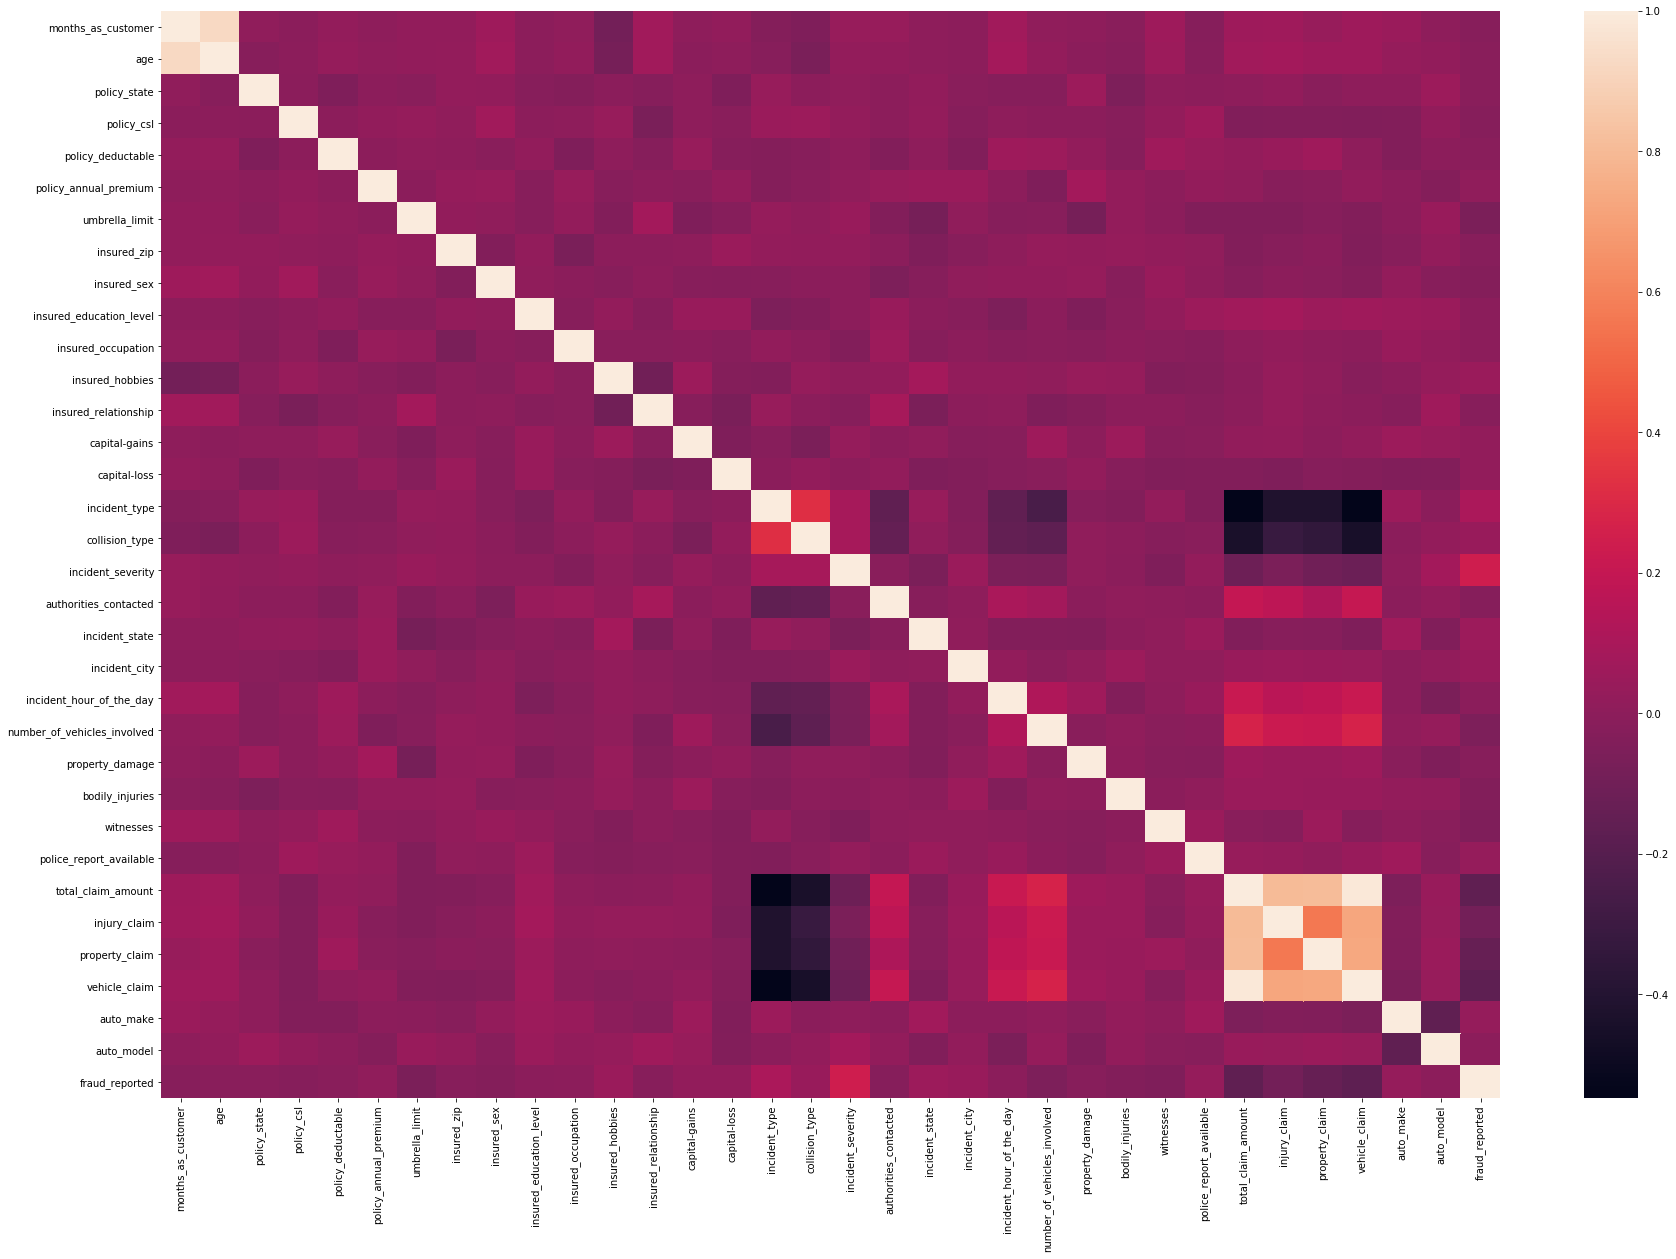

In [47]:
plt.figure(figsize =(30,20))
sns.heatmap(insure_ds.corr())

most of the features are towards negetive correalted 

In [48]:
# checking the variance of the feature to find out constant features
insure_ds.var()

months_as_customer             1.325104e+04
age                            8.354484e+01
policy_state                   2.141141e-01
policy_csl                     2.280270e-01
policy_deductable              3.743784e+05
policy_annual_premium          5.961772e+04
umbrella_limit                 5.278077e+12
insured_zip                    5.141121e+09
insured_sex                    2.488799e-01
insured_education_level        3.796641e+00
insured_occupation             1.615274e+01
insured_hobbies                3.219483e+01
insured_relationship           2.825770e+00
capital-gains                  7.768588e+08
capital-loss                   7.898403e+08
incident_type                  7.702102e-02
collision_type                 2.493493e-01
incident_severity              2.289129e-01
authorities_contacted          1.734444e-01
incident_state                 4.648084e+00
incident_city                  4.179023e+00
incident_hour_of_the_day       4.832159e+01
number_of_vehicles_involved    1

There is no constant feature in the dataet 

# Modeling

In [49]:
# Seprating X & Y values

X  = insure_ds.drop("fraud_reported",axis = 1)
y = insure_ds["fraud_reported"]

# To handle the imbalance problem
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
resam_X, resam_y = smote.fit_sample(X,y)
print(resam_X.shape)
print(resam_y.shape)

(1410, 33)
(1410,)


In [50]:
for i in range(30,200,40):
    X_train,X_test,y_train,y_test = train_test_split(resam_X,resam_y, test_size = 0.2, random_state = i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    pred = LR.predict(X_test)
    print("accuracy_score",accuracy_score(y_test,pred),"random_state",i)
    print("classification _report","\n",classification_report(y_test,pred))
    print("confusion_matrix","\n",confusion_matrix(y_test,pred))
    
    
#     """applying base model for find out the best random state and checking accordingly"""

accuracy_score 0.5460992907801419 random_state 30
classification _report 
               precision    recall  f1-score   support

           0       0.52      0.64      0.57       135
           1       0.58      0.46      0.52       147

    accuracy                           0.55       282
   macro avg       0.55      0.55      0.54       282
weighted avg       0.55      0.55      0.54       282

confusion_matrix 
 [[86 49]
 [79 68]]
accuracy_score 0.6063829787234043 random_state 70
classification _report 
               precision    recall  f1-score   support

           0       0.58      0.68      0.63       138
           1       0.64      0.53      0.58       144

    accuracy                           0.61       282
   macro avg       0.61      0.61      0.60       282
weighted avg       0.61      0.61      0.60       282

confusion_matrix 
 [[94 44]
 [67 77]]
accuracy_score 0.5673758865248227 random_state 110
classification _report 
               precision    recall  f1-score 

In [51]:
# """ Applying multiple models on the dataset for find best model """


Model = [RandomForestClassifier(), DecisionTreeClassifier(), SVC(),KNeighborsClassifier(),GaussianNB()]
for i in Model:
    X_train,X_test,y_train,y_test = train_test_split(resam_X,resam_y, test_size = 0.2, random_state = 190)
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print("accuracy_score",accuracy_score(y_test,pred),i)
    print("classification _report","\n",classification_report(y_test,pred))
    print("confusion_matrix","\n",confusion_matrix(y_test,pred))

accuracy_score 0.8297872340425532 RandomForestClassifier()
classification _report 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       132
           1       0.89      0.77      0.83       150

    accuracy                           0.83       282
   macro avg       0.83      0.83      0.83       282
weighted avg       0.84      0.83      0.83       282

confusion_matrix 
 [[118  14]
 [ 34 116]]
accuracy_score 0.75177304964539 DecisionTreeClassifier()
classification _report 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       132
           1       0.80      0.71      0.75       150

    accuracy                           0.75       282
   macro avg       0.75      0.75      0.75       282
weighted avg       0.76      0.75      0.75       282

confusion_matrix 
 [[105  27]
 [ 43 107]]
accuracy_score 0.5177304964539007 SVC()
classification _report 
               precision    reca

# GridSearch

In [52]:
#as checked that Randomforest is giving highest accuracy out of all model thus applying Grid Search CV on it for finding bestparameters

RF = RandomForestClassifier()

para = {"n_estimators" :[100,200,300],
       "max_depth":[2,3,4,5,6],
       "min_samples_split":[2,3,4,5],
       "criterion":["gini","entropy"] }

grid_score = GridSearchCV(RF,para,scoring = "f1",cv = 5,n_jobs= -1,verbose =2)
grid_score.fit(X_train,y_train)
print(grid_score.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.7min finished


{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 200}


# Cross_val_score

In [53]:
# best_RF = RandomForestClassifier(criterion = "gini",max_depth=6 ,min_samples_split =5 , n_estimators = 100)

# for i in range(2,11):
#     cross_score = cross_val_score(best_RF,resam_X,resam_y,scoring = "f1",cv = i)
#     print(i,cross_score.mean() ,"and std is", cross_score.std())

2 0.7213286713286714 and std is 0.005944055944056004
3 0.724070537191931 and std is 0.03982424662860767
4 0.7416851446248417 and std is 0.04223834635635621
5 0.7605910519963228 and std is 0.04384689379724189
6 0.7569192414688141 and std is 0.043678777628378955
7 0.7565206884041583 and std is 0.04498399092687871
8 0.7646845018495316 and std is 0.059207296887745765
9 0.7557430944206239 and std is 0.058766982251149805
10 0.7520159527219256 and std is 0.05137355712021186


# Saving Model

In [54]:
import pickle

best_RF.fit(resam_X,resam_y)

filename = "isnureance_fraud_detection.pkl"

with open(filename, "wb") as f:
    pickle.dump(best_RF.fit,f)

# Conclusion<br>

dataset was mix of datatypes string and numeric,have converted them into numeric. By analysing data, we come to know that fruad claim's amount was higher in all the categories, from hobbies, we came to know that people who are having gaming habbit, they did it more. policies who were sold during 2015, no fraud was made from that year. we had some missing value in the dataset , which were filled with their mode values.
we have deleted some unncessary feature from the dataset and checked the correlation, we have found that maximum features are nagetive correlated. I have checked the variacne all the columns and found that there is no constant features in the dataset.<br>
since dataset was imbalance, have tried modeling with same dataset but precision and f1 score for "Yes" was very low , we can say it waas close to zero, accuracy prediction was not happening for them.<br>
i have performed upsample method to make it balance and then applied model. we have seen good precision and f1 socre. have applied multiple models and checked that which one is working good on the data. I have found that Randomforest has given good accuracy as always.

I have picked Randomforest for final model and applied Grid search CV for hyper parameter tunning and after the with best parameter, i have performed cross validation. 
have got good average score at CV 8 with low standard deviation and saved the model with that.